In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [12]:
x_size_cum  = [0, 3.4, 7.8, 11.9, 15, 18, 21, 23] # number of parameters until 
# Number of parameters *unquantized*
#x_size_cum = [23 - x for x in x_size_cum]
experiments = [0,  25,  33,   42, 45, 48, 51, 53]
experiments.reverse()
mapping = dict(zip(experiments, x_size_cum))

In [13]:
df = pd.read_csv('qat-data.csv')

In [14]:
df.head()

,Experiment,V100_TTA,V100_TRACEMALLOC,V100_TF_MEM
0,53,1574.098135,615788072,5914434983
1,51,2049.356562,615477571,6050077440
2,48,4206.123628,615471135,6054697728
3,45,8202.690574,615474963,6056963840
4,42,8566.486342,615478513,6053175040


In [15]:
# Replace experiment numbers with numbrs of parameters quantized
df['Experiment'] = df['Experiment'].map(mapping)
df.rename(columns={'Experiment': 'no_parameters_quantized'}, inplace=True)

In [16]:
df.head()

,no_parameters_quantized,V100_TTA,V100_TRACEMALLOC,V100_TF_MEM
0,0.0,1574.098135,615788072,5914434983
1,3.4,2049.356562,615477571,6050077440
2,7.8,4206.123628,615471135,6054697728
3,11.9,8202.690574,615474963,6056963840
4,15.0,8566.486342,615478513,6053175040


# TTA

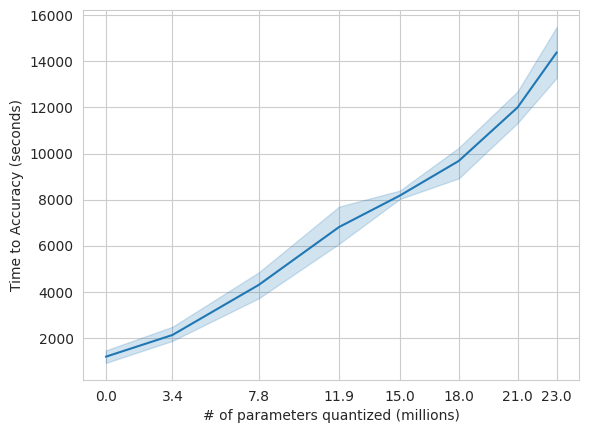

In [17]:
# Plotting
sns.set_style("whitegrid")
# sns.lineplot(data=df, x='no_parameters_quantized', y='V100_TTA', err_style='bars')
sns.lineplot(data=df, x='no_parameters_quantized', y='V100_TTA')

# plt.title('Time to Accuracy vs X_Size_Cum')
plt.xlabel('# of parameters quantized (millions)')
plt.ylabel('Time to Accuracy (seconds)')
plt.xticks([0, 3.4, 7.8, 11.9, 15, 18, 21, 23])

# plt.show()
plt.savefig("V100_TTA.png")

# Peak memory consumption

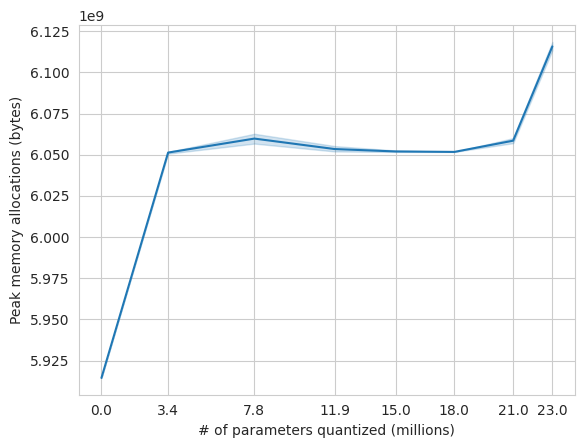

In [18]:
sns.lineplot(data=df, x='no_parameters_quantized', y='V100_TF_MEM')

# plt.title('Time to Accuracy vs X_Size_Cum')
plt.xlabel('# of parameters quantized (millions)')
plt.ylabel('Peak memory allocations (bytes)')
plt.xticks([0, 3.4, 7.8, 11.9, 15, 18, 21, 23])

# plt.show()
plt.savefig("V100_TF_MEM.png")

# Final Model Size

In [54]:
y_size = [90.06, 80.03, 67.37, 55.52, 46.58, 37.17, 27.38, 23.54]

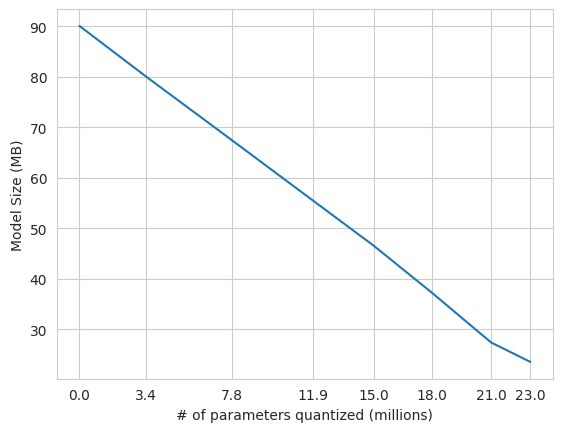

In [56]:
sns.lineplot(x=x_size_cum, y=y_size)

# Set labels and title
plt.xlabel('# of parameters quantized (millions)')
plt.ylabel('Model Size (MB)')

# Show the plot
plt.xticks([0, 3.4, 7.8, 11.9, 15, 18, 21, 23])
plt.savefig('qat-model-size.png')
plt.show()

# CPU TTA

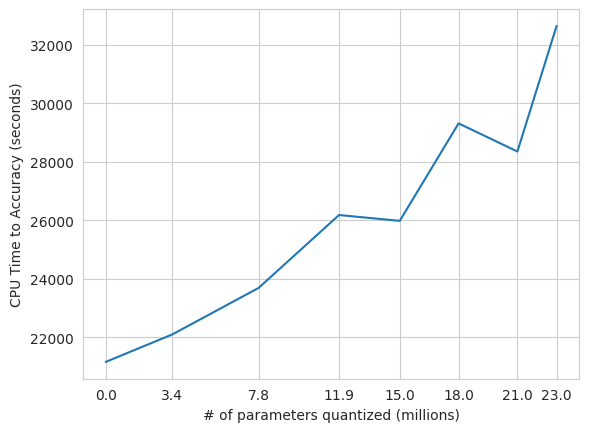

In [59]:
y_cpu_tta = [21157.5, 22098.75, 23688.5, 26180.77, 25981.6, 29314.8, 28353, 32648]
sns.lineplot(x=x_size_cum, y=y_cpu_tta)

# Set labels and title
plt.xlabel('# of parameters quantized (millions)')
plt.ylabel('CPU Time to Accuracy (seconds)')

# Show the plot
plt.xticks([0, 3.4, 7.8, 11.9, 15, 18, 21, 23])
plt.savefig('qat-cpu-tta.png')
plt.show()

# MiniQML

In [20]:
# X axis (epochs):
x = [0, 1, 2, 3, 4, 5, 6, 7]

In [31]:
y_quant_full_cor = np.array([0.1233, 0.7275, 0.7869, 0.8252, 0.8625, 0.8689, 0.8786, 0.8884])
y_quant_style_cor = np.array([0.1233, 0.8481, 0.8662, 0.8447, 0.8625, 0.891, 0.8894, 0.8957])
y_quant_aware_cor = np.array([0.1, 0.9526, 0.9687, 0.9683, 0.9717, 0.9702, 0.9727, 0.9740])
y_quant_cor = np.array([0.120800, 0.886400, 0.907300, 0.917500, 0.917900, 0.919100, 0.921800, 0.923400])

In [33]:
data = {'Epochs': x, 
        'Quant Full': y_quant_full_cor * 100, 
        'Quant Like': y_quant_style_cor * 100, 
        'Quant Aware': y_quant_aware_cor * 100, 
        'Quant': y_quant_cor * 100}
df = pd.DataFrame(data)
df.head()

,Epochs,Quant Full,Quant Like,Quant Aware,Quant
0,0,12.33,12.33,10.00,12.08
1,1,72.75,84.81,95.26,88.64
2,2,78.69,86.62,96.87,90.73
3,3,82.52,84.47,96.83,91.75
4,4,86.25,86.25,97.17,91.79


In [34]:
# long format
df_melted = df.melt('Epochs', var_name='Variable', value_name='Value')
df_melted.head()

,Epochs,Variable,Value
0,0,Quant Full,12.33
1,1,Quant Full,72.75
2,2,Quant Full,78.69
3,3,Quant Full,82.52
4,4,Quant Full,86.25


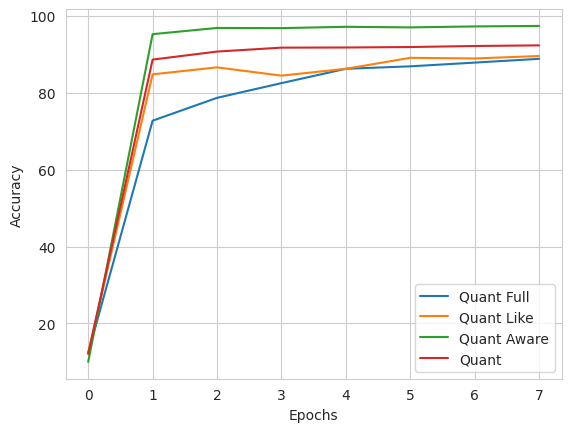

In [37]:
# Plot using lineplot
sns.lineplot(data=df_melted, x='Epochs', y='Value', hue='Variable')

# Set labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Show the plot
plt.legend(loc='best')  # Optional: Adjust legend position
plt.savefig('miniqmlgraph1.png')
plt.show()

In [46]:
y_quant_full_loss = np.array([1552.57324, 126.75847, 113.10962, 87.71154, 78.92268, 74.66079, 71.63672, 70.92323])
y_quant_style_loss = np.array([1552.57324, 93.58325, 84.0659, 78.08979, 76.86287, 67.7512, 68.09092, 74.63633])
y_quant_loss = np.array([323.325009, 67.858551, 53.514287, 47.557490, 45.630711, 43.787021, 41.994399, 42.003681])

In [47]:
data2 = {
    'Epochs': x,
    'Quant Full': y_quant_full_loss,
    'Quant Like': y_quant_style_loss,
    'Quant': y_quant_loss
}
df2 = pd.DataFrame(data2)

In [48]:
df2 = df2.melt('Epochs', var_name='Variable', value_name='Value')

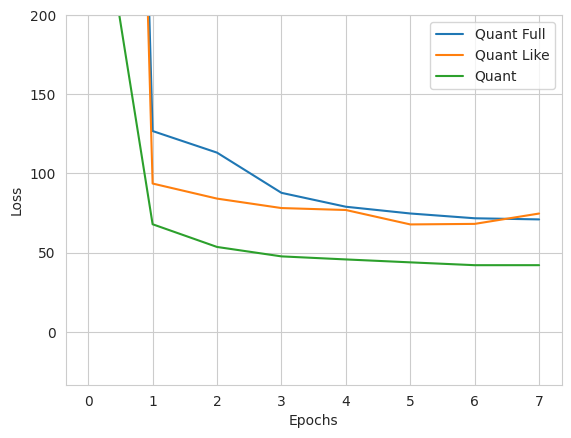

In [52]:
# Plot using lineplot
sns.lineplot(data=df2, x='Epochs', y='Value', hue='Variable')

# Set labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(top=200)

# Show the plot
plt.legend(loc='best')  # Optional: Adjust legend position
plt.savefig('miniqmlgraph2.png')
plt.show()